In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import lib
from lib import data_dis, data_ref, data_vst

In [3]:
import numpy as np
from ksvd import ApproximateKSVD
import nibabel as nib
import matplotlib.pyplot as plt

In [4]:
image = data_dis[0]

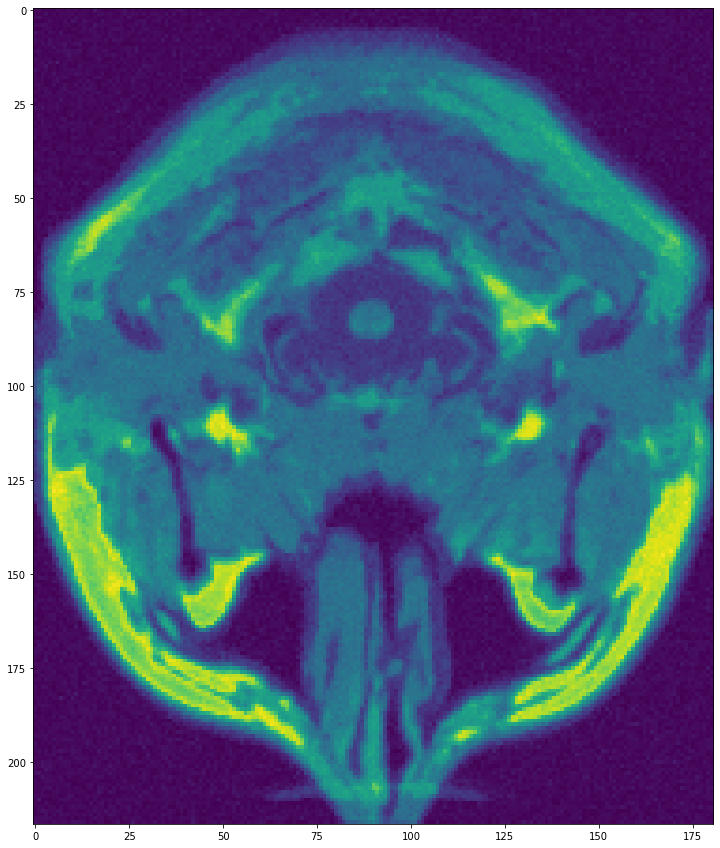

In [5]:
plt.figure(figsize=(15, 15))
plt.imshow(image)

In [6]:
blocked, shape = lib.split_data_to_blocks_2d(image, 4, 1)

In [7]:
merged = lib.merge_blocks_2d_stide_1(blocked, shape)

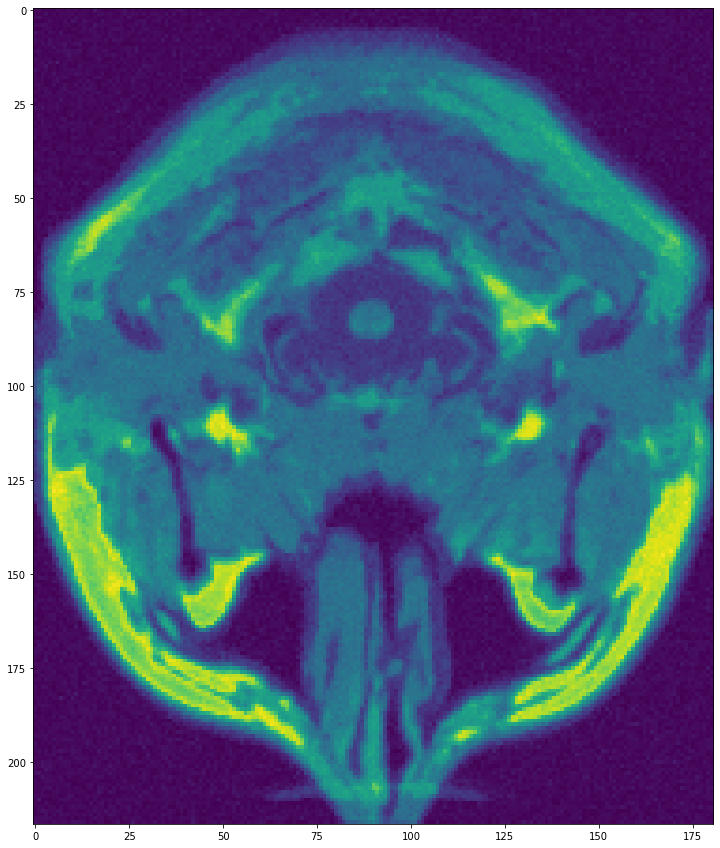

In [8]:
plt.figure(figsize=(15, 15))
plt.imshow(merged)

In [9]:
aksvd = ApproximateKSVD(n_components=30, transform_n_nonzero_coefs=7)
dictionary = aksvd.fit(blocked).components_
gamma = aksvd.transform(blocked)
error = np.abs(gamma @ dictionary - blocked).mean()
print(error, (gamma != 0).sum() / gamma.size)
restored = gamma @ dictionary


17.33374199409309 0.23333333333333334


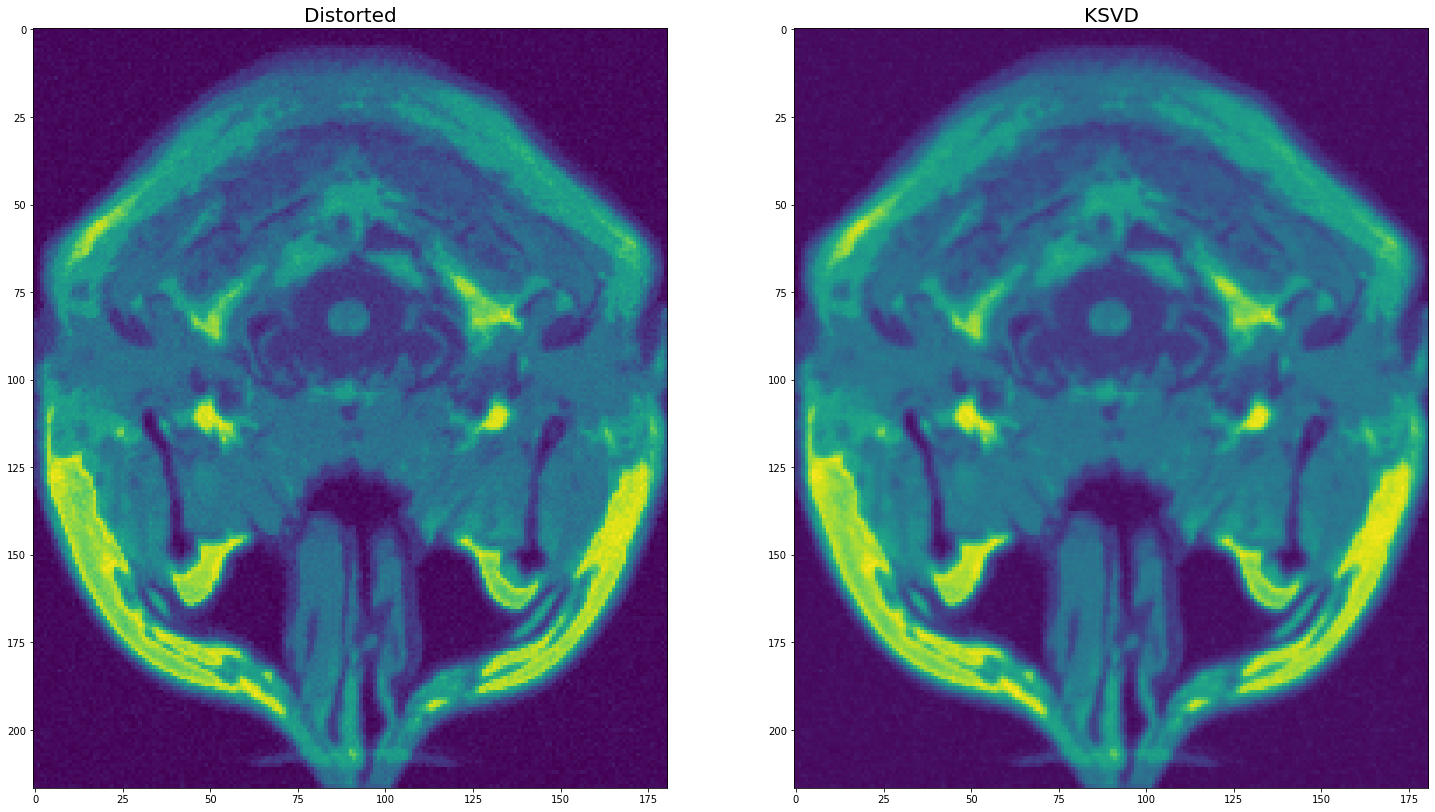

In [10]:
plt.figure(figsize=(25, 15))
plt.subplot(1, 2, 1)
plt.title('Distorted', fontsize=20)
plt.imshow(data_dis[0])
plt.subplot(1, 2, 2)
plt.title('KSVD', fontsize=20)
plt.imshow(lib.merge_blocks_2d_stide_1(restored, shape))
plt.show()

In [11]:
merged = lib.merge_blocks_2d_stide_1(restored, shape)

In [12]:
dictionary.shape, gamma.shape

((30, 16), (38092, 30))

In [16]:
weights = (gamma != 0).mean(axis=0)

In [19]:
dictionary_new = dictionary * (1 + 8 * weights).reshape(-1, 1)

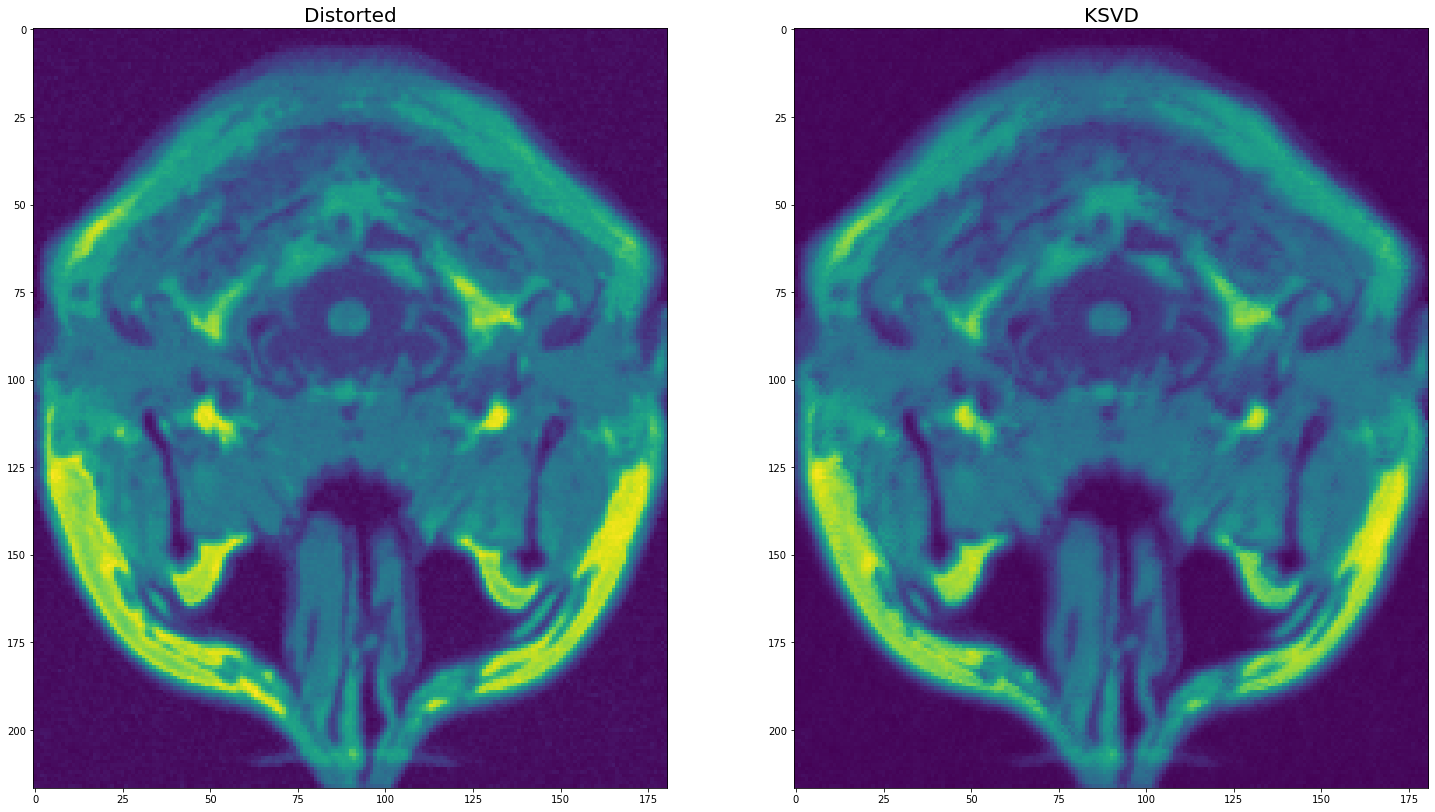

In [21]:
plt.figure(figsize=(25, 15))
plt.subplot(1, 2, 1)
plt.title('Distorted', fontsize=20)
plt.imshow(lib.merge_blocks_2d_stide_1(restored, shape))
plt.subplot(1, 2, 2)
plt.title('KSVD', fontsize=20)
plt.imshow(lib.merge_blocks_2d_stide_1(gamma @ dictionary_new, shape))
plt.show()